# Model structure

In [4]:
from tensorflow.keras import models, layers, backend, callbacks, metrics

## V1

In [5]:
dropout = [0, 0, 0, 0]
img_shape = (224,224,1)

In [6]:
left_input = layers.Input(img_shape)
right_input = layers.Input(img_shape)

# Convolutional Neural Network
cnn = models.Sequential()
cnn.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=img_shape))
cnn.add(layers.MaxPooling2D((3, 3)))

cnn.add(layers.Conv2D(48, (3, 3), activation='relu'))
cnn.add(layers.MaxPooling2D((2, 2)))
cnn.add(layers.Dropout(dropout[0]))

cnn.add(layers.Conv2D(48, (3, 3), activation='relu'))
cnn.add(layers.MaxPooling2D((2, 2)))
cnn.add(layers.Dropout(dropout[1]))

cnn.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn.add(layers.MaxPooling2D((2, 2)))
cnn.add(layers.Dropout(dropout[2]))

cnn.add(layers.GlobalAveragePooling2D())
cnn.add(layers.Dense(48, activation='relu'))
cnn.add(layers.Dropout(dropout[3]))

# Generate the encodings (feature vectors) for the two images
left_feats = cnn(left_input)
right_fits = cnn(right_input)

# Add a customized layer to compute the difference between the encodings
difference_layer = layers.Lambda(lambda tensors:backend.abs(tensors[0] - tensors[1]))
distance = difference_layer([left_feats, right_fits])

# Add a dense layer with a sigmoid unit to generate the similarity score
prediction = layers.Dense(1,activation='sigmoid')(distance)

# Connect the inputs with the outputs
model = models.Model(inputs=[left_input,right_input],outputs=prediction)

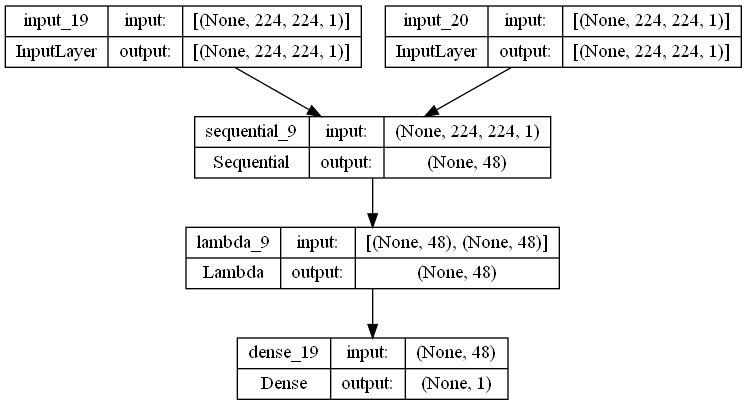

In [27]:
plot_model(model, show_shapes=True,)

In [7]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 1  0           []                               
                                )]                                                                
                                                                                                  
 input_2 (InputLayer)           [(None, 224, 224, 1  0           []                               
                                )]                                                                
                                                                                                  
 sequential (Sequential)        (None, 48)           65808       ['input_1[0][0]',                
                                                                  'input_2[0][0]']            

## V2

In [1]:
from tensorflow.keras import models, layers, backend
from keras.utils.vis_utils import plot_model

In [2]:
dropout = [0, 0, 0, 0]
img_shape = (224,224,1)


left_input = layers.Input(img_shape)
right_input = layers.Input(img_shape)

# Convolutional Neural Network
cnn = models.Sequential()
cnn.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=img_shape))
cnn.add(layers.MaxPooling2D((3, 3)))
cnn.add(layers.Dropout(dropout[0]))

cnn.add(layers.Conv2D(48, (3, 3), activation='relu'))
cnn.add(layers.MaxPooling2D((2, 2)))
cnn.add(layers.Dropout(dropout[1]))

cnn.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn.add(layers.MaxPooling2D((2, 2)))
cnn.add(layers.Dropout(dropout[2]))

cnn.add(layers.Conv2D(96, (3, 3), activation='relu'))
cnn.add(layers.MaxPooling2D((2, 2)))
cnn.add(layers.Dropout(dropout[3]))

cnn.add(layers.GlobalAveragePooling2D())
cnn.add(layers.Dense(64, activation='relu'))

# Generate the encodings (feature vectors) for the two images
left_feats = cnn(left_input)
right_fits = cnn(right_input)

# Add a customized layer to compute the difference between the encodings
difference_layer = layers.Lambda(lambda tensors:backend.abs(tensors[0] - tensors[1]))
distance = difference_layer([left_feats, right_fits])

# Add a dense layer with a sigmoid unit to generate the similarity score
prediction = layers.Dense(1,activation='sigmoid')(distance)

# Connect the inputs with the outputs
model = models.Model(inputs=[left_input,right_input],outputs=prediction)

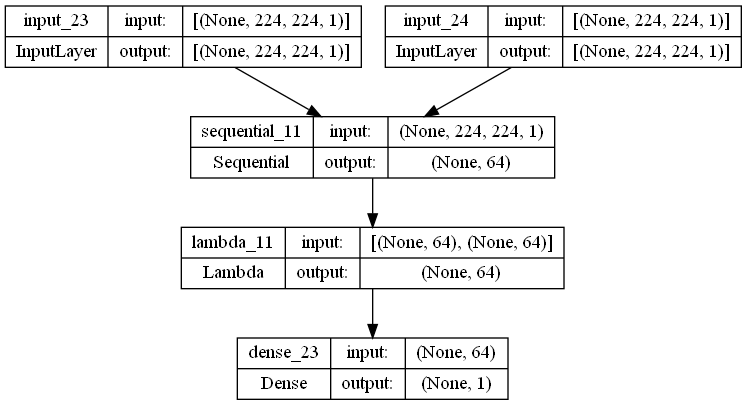

In [32]:
plot_model(model, show_shapes=True,)

In [3]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 74, 74, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 48)        13872     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 48)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 36, 36, 48)        0